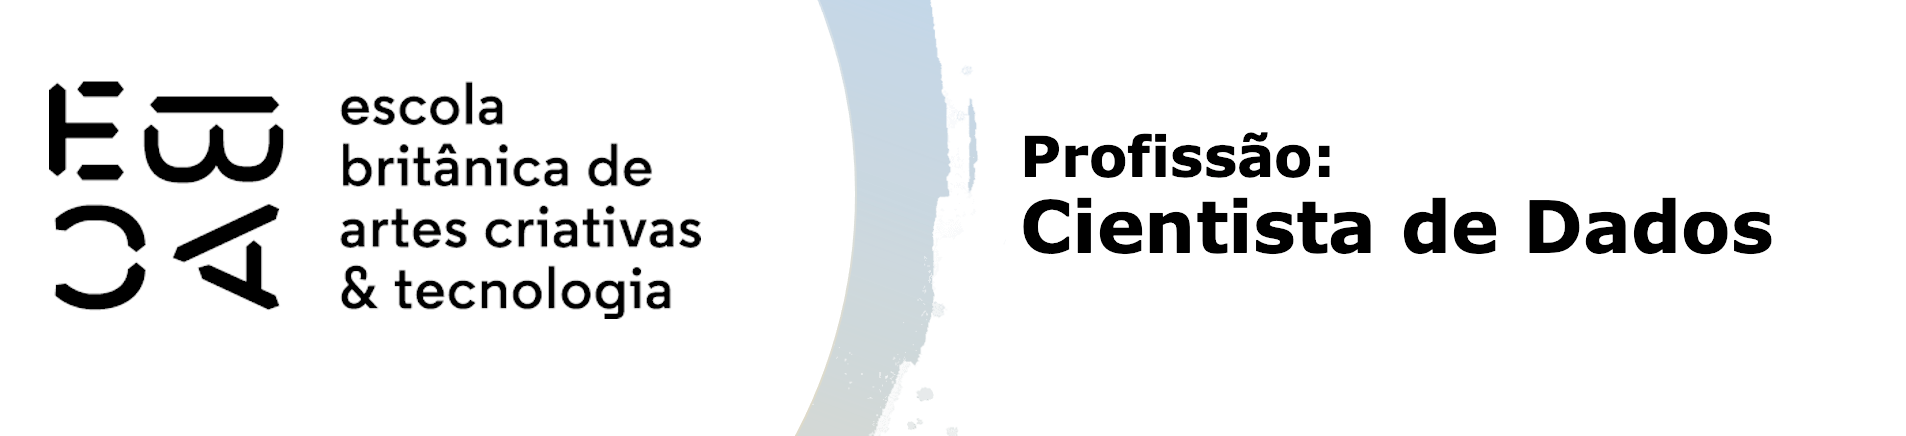

# Métodos hierárquicos de agrupamento - Tarefa

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

1. Selecionando a base de dados de pinguins e eliminando os valores faltantes

In [87]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [88]:
penguins.index.name='id'
peng_num = penguins.select_dtypes(include='number').dropna()
variaveis_quantitativas = peng_num[['bill_length_mm',
                                    'bill_depth_mm',
                                     'flipper_length_mm',
                                     'body_mass_g']]


3. Padronização

In [89]:
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(variaveis_quantitativas)

4. Agrupamento hierarquico em 3 grupos

In [90]:
agrup_3 = AgglomerativeClustering(linkage="complete", distance_threshold=None, n_clusters=3)
labels = agrup_3.fit_predict(peng_pad)

5. Dendrograma

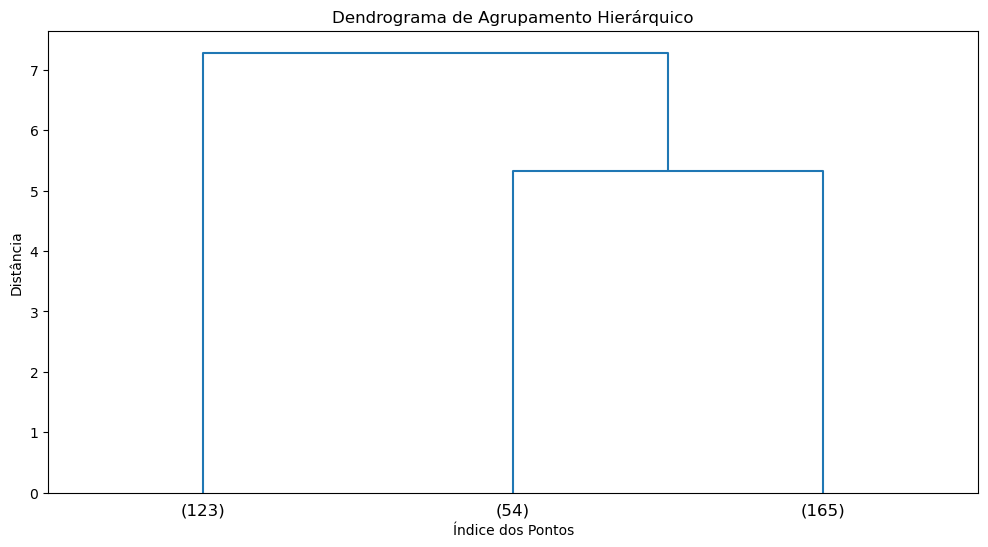

In [91]:
plt.figure(figsize=(12, 6))
plt.title('Dendrograma de Agrupamento Hierárquico')
plt.xlabel('Índice dos Pontos')
plt.ylabel('Distância')
Z = linkage(peng_pad, 'complete')
dendrogram(Z, p=3, truncate_mode='lastp', show_leaf_counts=True)
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [92]:
peng_num['grupo'] = agrup_3.labels_

penguins_3 = penguins.merge(peng_num['grupo'], how='left', on='id')
penguins_3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


In [93]:
pd.crosstab(penguins_3['species'], penguins_3['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


c:\Users\rafa_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rafa_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rafa_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rafa_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

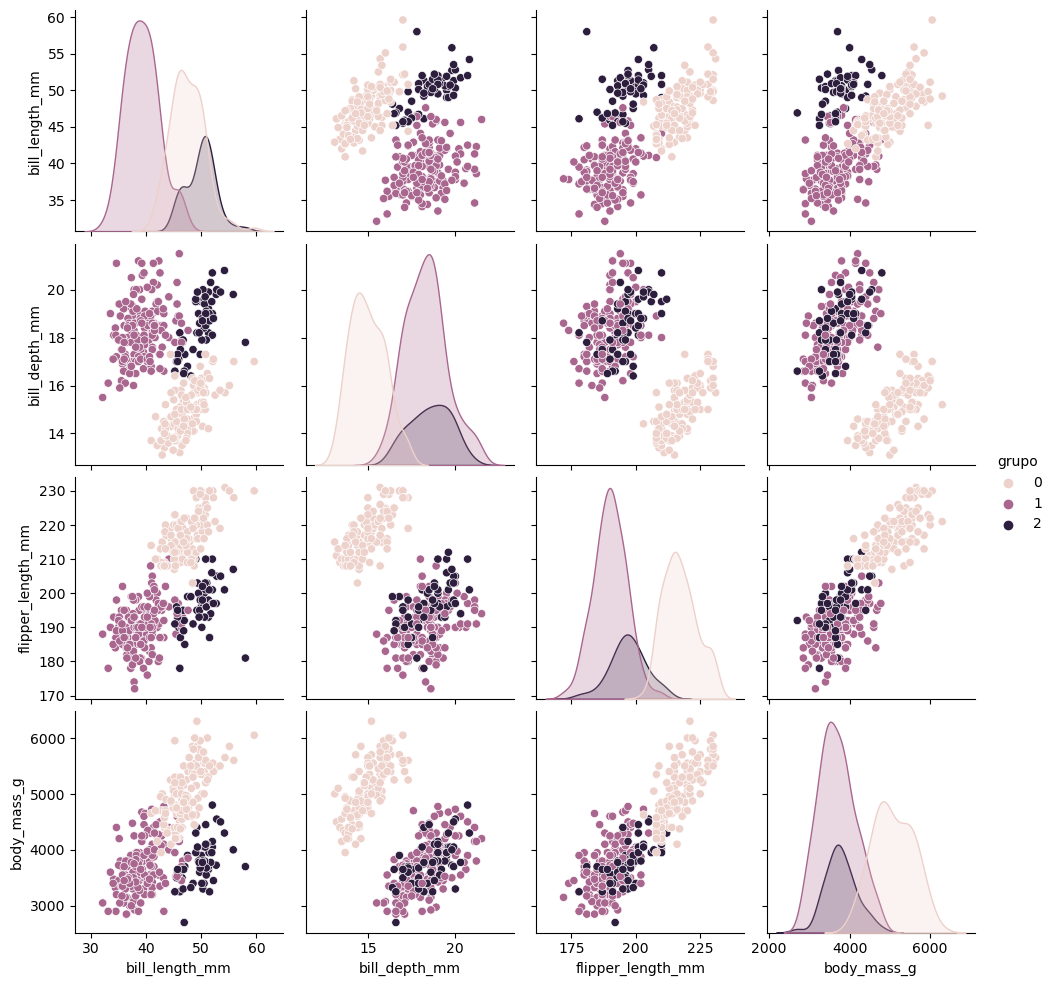

In [94]:
sns.pairplot(data=peng_num, hue='grupo')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

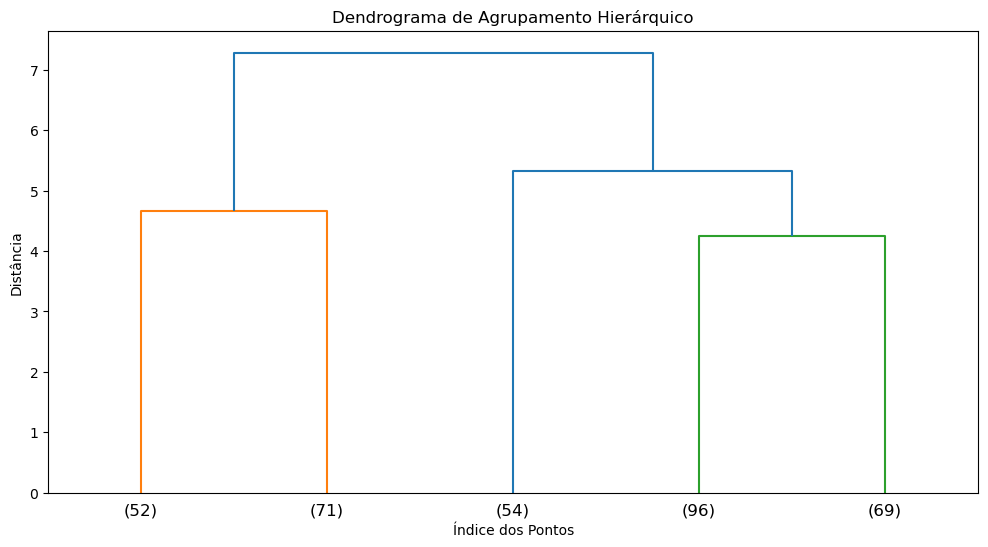

In [95]:
agrup_5 = AgglomerativeClustering(linkage="complete", distance_threshold=None, n_clusters=5)
labels_5 = agrup_5.fit_predict(peng_pad)

# 5. Fazer o Dendrograma
plt.figure(figsize=(12, 6))
plt.title('Dendrograma de Agrupamento Hierárquico')
plt.xlabel('Índice dos Pontos')
plt.ylabel('Distância')
Z = linkage(peng_pad, 'complete')
dendrogram(Z, p=5, truncate_mode='lastp', show_leaf_counts=True)
plt.show()

In [96]:
peng_num['grupo'] = agrup_5.labels_

penguins_5 = penguins.merge(peng_num['grupo'], how='left', on='id')

penguins_5.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,4.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,4.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,4.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,4.0


Quantos pinguins de cada espécie há em cada grupo?

In [97]:
pd.crosstab(penguins_5['species'], penguins_5['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?

In [98]:
pd.crosstab(penguins_5['sex'], penguins_5['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0
sex,,,,,
Female,20,9,13,49,74
Male,34,61,55,0,18


Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

O agrupamento com 5 grupos, principalmente com a separação nas especies. O grupo 0 não obteve um padrão significativo na questão do sexo, porém os outras grupos conseguiram um padrão melhor dos dados.